# Diffenent States in VAERS

States occur in different variations in the VAERSDATA. Texas e.g can be TX (most times) but also Tx or tx

In [165]:
import pandas as pd
import os

# Initialize a dictionary to store state counts
state_counts = {}

# Define the directory where the data files are located
data_directory = "/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/"


# Loop through each year from 1990 to 2023
for year in range(1990, 2024):
    try:
        # Construct the filename for the current year
        filename = f"{year}VAERSDATA.csv"
        data_path = os.path.join(data_directory, filename)

        # Load the CSV file for the current year
        data = pd.read_csv(data_path, encoding="Iso-8859-1", low_memory=False)
        # Make sure all state names are uppercase so that they can be counted correctly
        data['STATE'] = data['STATE'].str.upper()

        # Count the occurrences of each state for the current year
        state_counts_year = data['STATE'].value_counts().to_dict()

        # Update the cumulative state counts with the counts for the current year
        for state, count in state_counts_year.items():
            state_counts[state] = state_counts.get(state, 0) + count

    except FileNotFoundError:
        print(f"File for year {year} not found.")
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Print the list of different states and their counts
print("List of Different States in VAERSDATA and Their Counts:")
for state, count in state_counts.items():
    print(f"{state}: {count} times")


List of Different States in VAERSDATA and Their Counts:
CA: 161986 times
PA: 70546 times
NY: 88989 times
TX: 95509 times
MD: 33347 times
IL: 53016 times
NJ: 47284 times
FL: 84577 times
WI: 31493 times
OH: 56440 times
NC: 45353 times
MI: 66823 times
WA: 43303 times
IA: 15170 times
CO: 38126 times
GA: 42077 times
TN: 26684 times
NM: 11752 times
MA: 42221 times
VA: 44016 times
IN: 42906 times
KY: 23951 times
OR: 24062 times
MN: 35021 times
OK: 15744 times
AL: 15310 times
AZ: 34395 times
CT: 20793 times
LA: 14129 times
SC: 19274 times
MO: 28891 times
NH: 9632 times
UT: 12903 times
MS: 8339 times
SD: 4561 times
RI: 6111 times
ME: 9779 times
WV: 8128 times
AR: 11518 times
KS: 14475 times
VT: 4792 times
NE: 9715 times
ID: 9842 times
NV: 11869 times
DC: 4376 times
DE: 5179 times
AK: 5981 times
MT: 7088 times
ND: 4333 times
HI: 6486 times
WY: 2897 times
AS: 99 times
PR: 7658 times
VI: 397 times
GU: 392 times
MP: 62 times
MH: 30 times
FM: 66 times
PW: 5 times
XB: 11 times
XV: 2 times
QM: 3 times

In [169]:
len(state_counts)

64

# Reports per State 2023 (500k) 

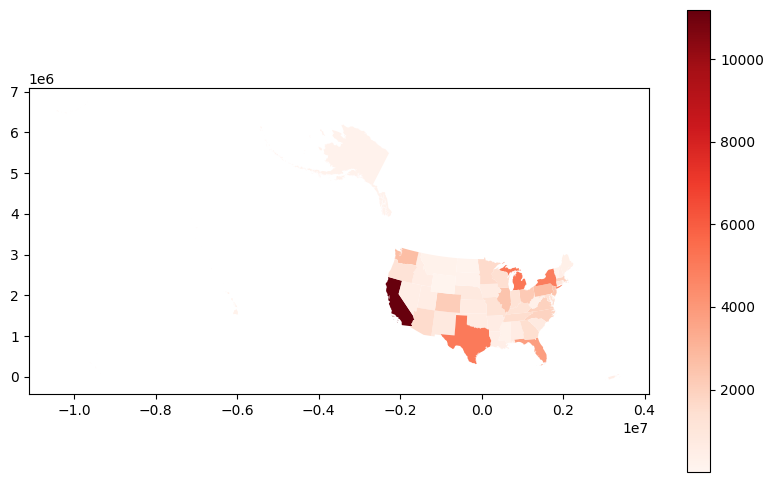

In [142]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data_2023 = pd.read_csv('/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/2023VAERSDATA.csv', encoding="Iso-8859-1", low_memory=False)

# Load the shapefile (replace 'path_to_shapefile' with the actual path to the shapefile)
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Apply .str.upper() to make state names uppercase
data_2023['STATE'] = data_2023['STATE'].str.upper()
gdf['STUSPS'] = gdf['STUSPS'].str.upper()

# Make sure your state column is named the same way as in the shapefile
# It might be necessary to adjust the state names/abbreviations to match the shapefile
states = data_2023['STATE'].value_counts()

# Merge the geodataframe with the states data
merged_gdf = gdf.set_index('STUSPS').join(states)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='count', ax=ax, legend=True, cmap='Reds')  # 'count' is the column name in your states Series
plt.show()


# Reports per State 2023 (20m)

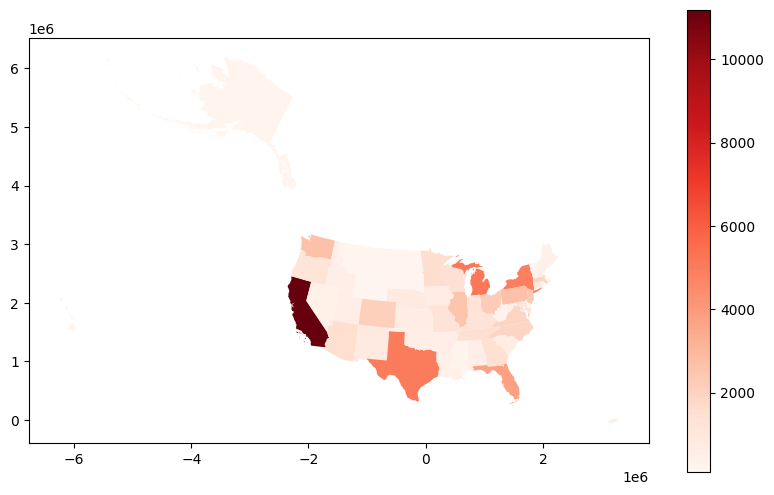

In [143]:
import geopandas as gpd

data_2023 = pd.read_csv('/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/2023VAERSDATA.csv', encoding="Iso-8859-1", low_memory=False)

# Load the shapefile (replace 'path_to_shapefile' with the actual path to the shapefile)
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Apply .str.upper() to make state names uppercase
data_2023['STATE'] = data_2023['STATE'].str.upper()
gdf['STUSPS'] = gdf['STUSPS'].str.upper()

# Make sure your state column is named the same way as in the shapefile
# It might be necessary to adjust the state names/abbreviations to match the shapefile
states = data_2023['STATE'].value_counts()

# Merge the geodataframe with the states data
merged_gdf = gdf.set_index('STUSPS').join(states)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='count', ax=ax, legend=True, cmap='Reds')  # 'count' is the column name in your states Series
plt.show()

# Since 1990 (20m) 

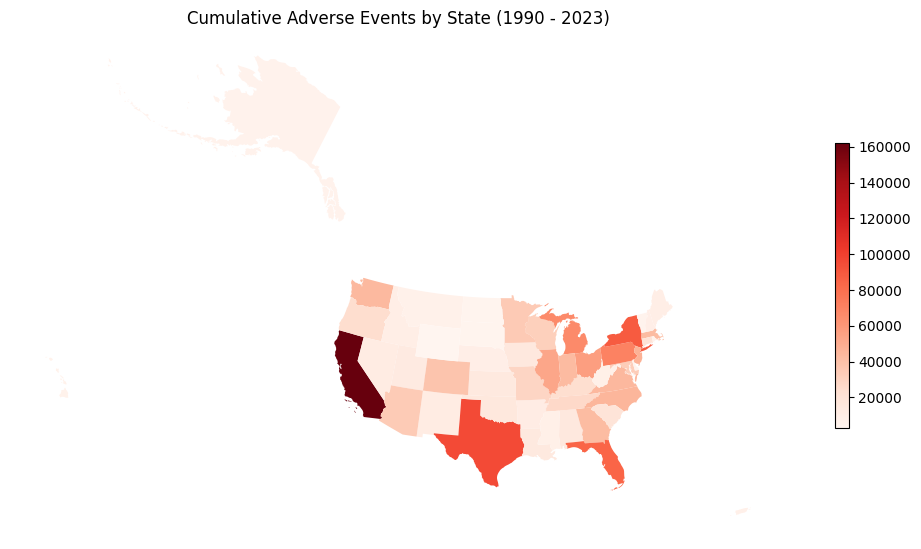

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile for US states
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Initialize a Series to store cumulative state counts
cumulative_state_counts = pd.Series(dtype=int)

for year in range(1990, 2024):
    try:
        data_path = f'/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv'
        data = pd.read_csv(data_path, encoding="Iso-8859-1", low_memory=False)
        data['STATE'] = data['STATE'].str.upper()
        state_counts = data['STATE'].value_counts()
        cumulative_state_counts = cumulative_state_counts.add(state_counts, fill_value=0)
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")

# Merge with geodataframe
merged_gdf = gdf.set_index('STUSPS').join(cumulative_state_counts.rename('count'))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='count', ax=ax, legend=True, cmap='Reds', legend_kwds={'shrink': 0.5})
plt.title('Cumulative Adverse Events by State (1990 - 2023)')
ax.set_axis_off()
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Reports_per_State/total_reports_per_state.png')

plt.show()


In [145]:
merged_gdf['count'].sum()

1538850.0

# Reports per State 2021 (20m)

Total Reports: 637195


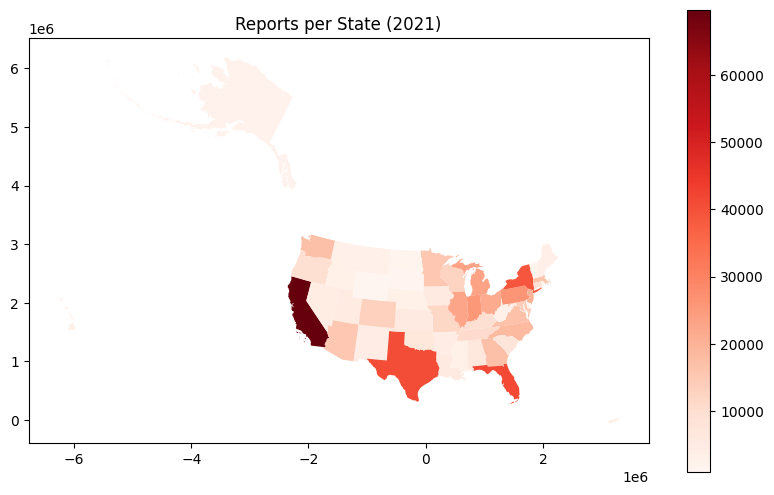

In [146]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data_2021 = pd.read_csv('/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/2021VAERSDATA.csv', encoding="Iso-8859-1", low_memory=False)

# Load the shapefile (replace 'path_to_shapefile' with the actual path to the shapefile)
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Make sure your state column is named the same way as in the shapefile
# It might be necessary to adjust the state names/abbreviations to match the shapefile
data_2021['STATE'] = data_2021['STATE'].str.upper()
states = data_2021['STATE'].value_counts()

# Print the total amount of reports
total_reports = states.sum()
print(f'Total Reports: {total_reports}')

# Merge the geodataframe with the states data
merged_gdf = gdf.set_index('STUSPS').join(states)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

merged_gdf.plot(column='count', ax=ax, legend=True, cmap='Reds')  # 'count' is the column name in your states Series
plt.title('Reports per State (2021)')
plt.show()


The Total Amount is now 637.195 instead of 752.097 because of missing values in the State column

# Reports per Capita

### Load census data for population per state from 1990 to 2023 for every 10 years

In [19]:
import pandas as pd

# Define the columns to rename
columns_to_rename = {
    'Unnamed: 0': 'STATE',
    'Unnamed: 1': 'Population 2020',
    'Unnamed: 3': 'Population 2010',
    'Unnamed: 5': 'Population 2000',
    'Unnamed: 7': 'Population 1990',
}

# Load the population data and skip the first 4 rows
census_data = pd.read_excel('/Users/sep/Documents/HAW/Masterarbeit/Census_Population/population-change-data-table.xlsx', skiprows=4)

# Select the columns with odd indices and rename them
selected_columns = ['Unnamed: 0'] + list(census_data.columns[1::2])
census_data = census_data[selected_columns].rename(columns=columns_to_rename)

# Add the STATE_SHORT column by mapping state names to abbreviations
state_to_usps = {
    'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

census_data = census_data.iloc[:, :5]
census_data['STATE_SHORT'] = census_data['STATE'].map(state_to_usps)
census_data = census_data[['STATE', 'STATE_SHORT'] + [col for col in census_data.columns if col not in ['STATE', 'STATE_SHORT']]]


In [20]:
census_data

,STATE,STATE_SHORT,Resident Population 2020 Census,Resident Population 2010 Census,Resident Population 2000 Census,Resident Population 1990 Census
0,Alabama,AL,5024279.0,4779736.0,4447100.0,4040587.0
1,Alaska,AK,733391.0,710231.0,626932.0,550043.0
2,Arizona,AZ,7151502.0,6392017.0,5130632.0,3665228.0
3,Arkansas,AR,3011524.0,2915918.0,2673400.0,2350725.0
4,California,CA,39538223.0,37253956.0,33871648.0,29760021.0
5,Colorado,CO,5773714.0,5029196.0,4301261.0,3294394.0
6,Connecticut,CT,3605944.0,3574097.0,3405565.0,3287116.0
7,Delaware,DE,989948.0,897934.0,783600.0,666168.0
8,District of Columbia,DC,689545.0,601723.0,572059.0,606900.0
9,Florida,FL,21538187.0,18801310.0,15982378.0,12937926.0


### Reports per captita 1990

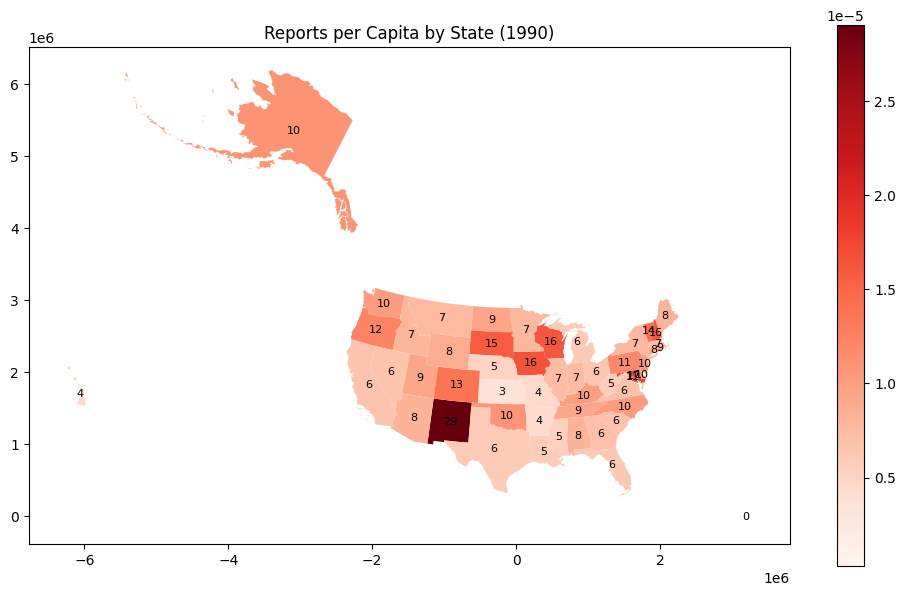

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Year variable
year = 1990  # Change this to switch the year (e.g., 2000)

# Load your VAERS data for the specified year
vaers_file = f'/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv'
data_vaers = pd.read_csv(vaers_file, encoding="Iso-8859-1", low_memory=False)
data_vaers['STATE'] = data_vaers['STATE'].str.upper()

# Load the population data for the specified year
# Assuming you have a consistent way to access census data for different years
census_data_copy = census_data[['STATE', 'STATE_SHORT', f'Resident Population {year} Census']]

# Count the entries per state in the VAERS data and rename the series for clarity
state_counts = data_vaers['STATE'].value_counts().rename('count')

# Merge the population data with the state counts
census_data_copy.set_index('STATE_SHORT', inplace=True)
state_counts_df = state_counts.to_frame().join(census_data_copy, how='left')
state_counts_df['count'] = state_counts_df['count'].astype('float64')
state_counts_df['entries_per_capita'] = state_counts_df['count'] / state_counts_df[f'Resident Population {year} Census']

# Load the shapefile and set the projection
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Merge the geodataframe with the calculated entries per capita
merged_gdf = gdf.set_index('STUSPS').join(state_counts_df[['entries_per_capita']])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='entries_per_capita', ax=ax, legend=True, cmap='Reds')
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['entries_per_capita'] * 1000000):
    ax.text(x, y, int(label), ha='center', va='center', fontsize=8, color='black')
plt.title(f'Reports per Capita by State ({year})')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Reports_per_State/Reports_per_Capita_1990.png')
plt.show()


### Reports per captita 2000

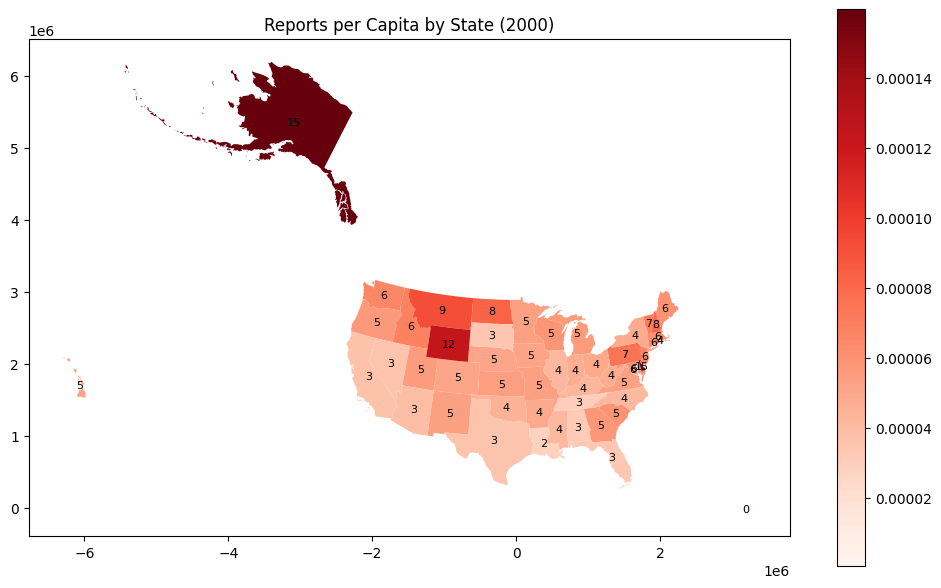

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Year variable
year = 2000  # Change this to switch the year (e.g., 2000)

# Load your VAERS data for the specified year
vaers_file = f'/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv'
data_vaers = pd.read_csv(vaers_file, encoding="Iso-8859-1", low_memory=False)
data_vaers['STATE'] = data_vaers['STATE'].str.upper()

# Load the population data for the specified year
# Assuming you have a consistent way to access census data for different years
census_data_copy = census_data[['STATE', 'STATE_SHORT', f'Resident Population {year} Census']]

# Count the entries per state in the VAERS data and rename the series for clarity
state_counts = data_vaers['STATE'].value_counts().rename('count')

# Merge the population data with the state counts
census_data_copy.set_index('STATE_SHORT', inplace=True)
state_counts_df = state_counts.to_frame().join(census_data_copy, how='left')
state_counts_df['count'] = state_counts_df['count'].astype('float64')
state_counts_df['entries_per_capita'] = state_counts_df['count'] / state_counts_df[f'Resident Population {year} Census']

# Load the shapefile and set the projection
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Merge the geodataframe with the calculated entries per capita
merged_gdf = gdf.set_index('STUSPS').join(state_counts_df[['entries_per_capita']])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='entries_per_capita', ax=ax, legend=True, cmap='Reds')
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['entries_per_capita'] * 100000):
    ax.text(x, y, int(label), ha='center', va='center', fontsize=8, color='black')
plt.title(f'Reports per Capita by State ({year})')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Reports_per_State/Reports_per_Capita_2000.png')
plt.show()


### Reports per captita 2010

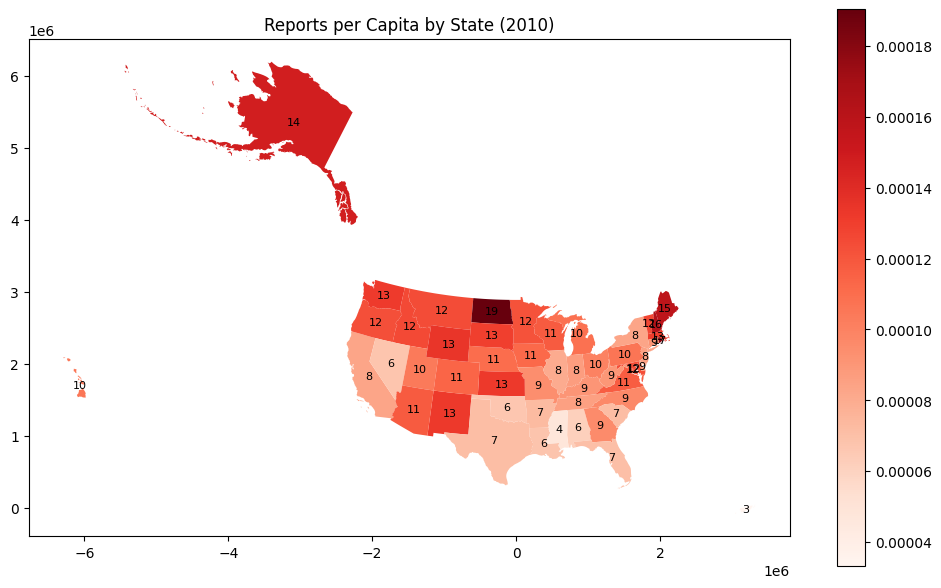

In [23]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Year variable
year = 2010  # Change this to switch the year (e.g., 2000)

# Load your VAERS data for the specified year
vaers_file = f'/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv'
data_vaers = pd.read_csv(vaers_file, encoding="Iso-8859-1", low_memory=False)
data_vaers['STATE'] = data_vaers['STATE'].str.upper()

# Load the population data for the specified year
# Assuming you have a consistent way to access census data for different years
census_data_copy = census_data[['STATE', 'STATE_SHORT', f'Resident Population {year} Census']]

# Count the entries per state in the VAERS data and rename the series for clarity
state_counts = data_vaers['STATE'].value_counts().rename('count')

# Merge the population data with the state counts
census_data_copy.set_index('STATE_SHORT', inplace=True)
state_counts_df = state_counts.to_frame().join(census_data_copy, how='left')
state_counts_df['count'] = state_counts_df['count'].astype('float64')
state_counts_df['entries_per_capita'] = state_counts_df['count'] / state_counts_df[f'Resident Population {year} Census']

# Load the shapefile and set the projection
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Merge the geodataframe with the calculated entries per capita
merged_gdf = gdf.set_index('STUSPS').join(state_counts_df[['entries_per_capita']])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='entries_per_capita', ax=ax, legend=True, cmap='Reds')
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['entries_per_capita'] * 100000):
    ax.text(x, y, int(label), ha='center', va='center', fontsize=8, color='black')
plt.title(f'Reports per Capita by State ({year})')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Reports_per_State/Reports_per_Capita_2010.png')
plt.show()


### Reports per captita 2020

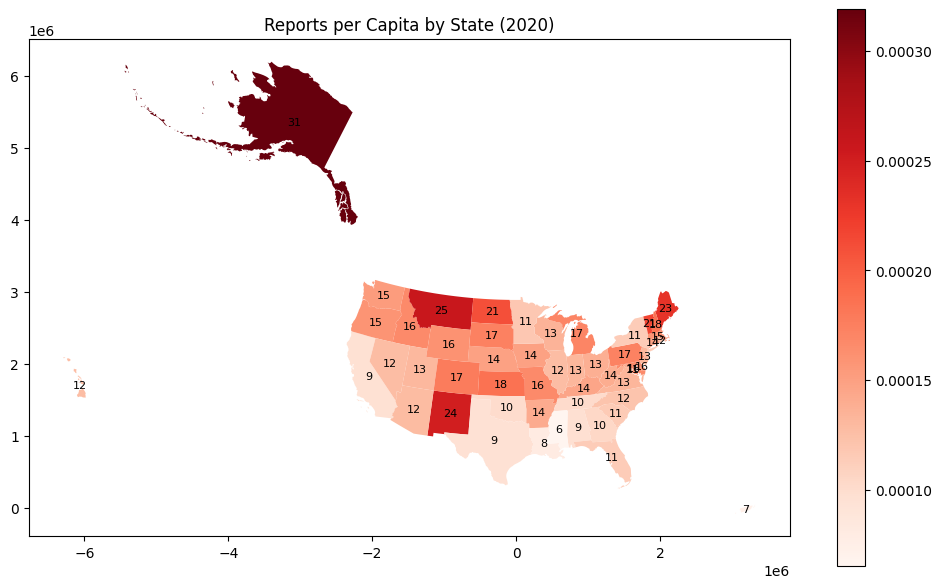

In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Year variable
year = 2020  # Change this to switch the year (e.g., 2000)

# Load your VAERS data for the specified year
vaers_file = f'/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv'
data_vaers = pd.read_csv(vaers_file, encoding="Iso-8859-1", low_memory=False)
data_vaers['STATE'] = data_vaers['STATE'].str.upper()

# Load the population data for the specified year
# Assuming you have a consistent way to access census data for different years
census_data_copy = census_data[['STATE', 'STATE_SHORT', f'Resident Population {year} Census']]

# Count the entries per state in the VAERS data and rename the series for clarity
state_counts = data_vaers['STATE'].value_counts().rename('count')

# Merge the population data with the state counts
census_data_copy.set_index('STATE_SHORT', inplace=True)
state_counts_df = state_counts.to_frame().join(census_data_copy, how='left')
state_counts_df['count'] = state_counts_df['count'].astype('float64')
state_counts_df['entries_per_capita'] = state_counts_df['count'] / state_counts_df[f'Resident Population {year} Census']

# Load the shapefile and set the projection
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Merge the geodataframe with the calculated entries per capita
merged_gdf = gdf.set_index('STUSPS').join(state_counts_df[['entries_per_capita']])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='entries_per_capita', ax=ax, legend=True, cmap='Reds')
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['entries_per_capita'] * 100000):
    ax.text(x, y, int(label), ha='center', va='center', fontsize=8, color='black')
plt.title(f'Reports per Capita by State ({year})')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Reports_per_State/Reports_per_Capita_2020.png')
plt.show()



link to the population data: https://www2.census.gov/programs-surveys/popest/tables/2020-2023/state/totals/NST-EST2023-POP.xlsx

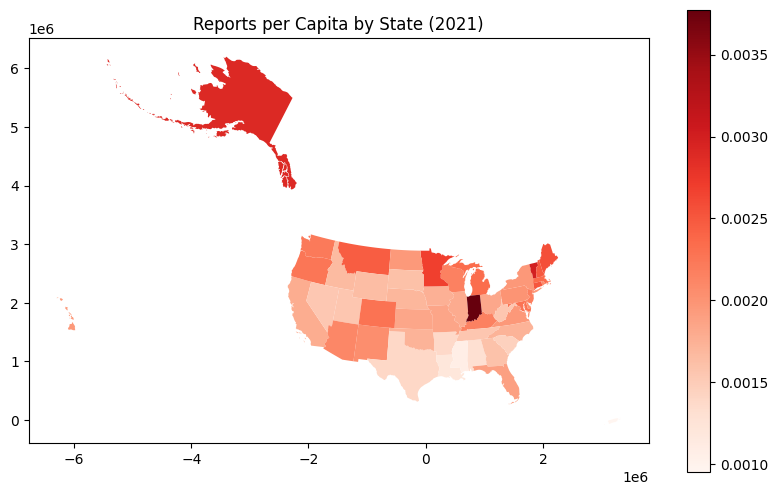

In [261]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load your 2021 VAERS data
data_2021 = pd.read_csv('/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/2021VAERSDATA.csv', encoding="Iso-8859-1", low_memory=False)
data_2021['STATE'] = data_2021['STATE'].str.upper()

# Load the population data
population_2021 = pd.read_excel('/Users/sep/Documents/HAW/Masterarbeit/Census_Population/NST-EST2023-POP.xlsx', skiprows=8, usecols=[0, 3]).dropna().reset_index(drop=True)
population_2021.columns = ['STATE', 'POPULATION']
population_2021['STATE'] = population_2021['STATE'].str.lstrip('.')
# Apply the mapping to convert state names to abbreviations
population_2021['STATE_SHORT'] = population_2021['STATE'].map(state_to_usps)

# Count the entries per state in the VAERS data and rename the series for clarity
state_counts = data_2021['STATE'].value_counts().rename('count')

# Merge the population data with the state counts
population_2021.set_index('STATE_SHORT', inplace=True)
state_counts_df = state_counts.to_frame().join(population_2021, how='left')
state_counts_df['count'] = state_counts_df['count'].astype('float64')
state_counts_df['entries_per_capita'] = state_counts_df['count'] / state_counts_df['POPULATION']

# Load the shapefile and set the projection
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Merge the geodataframe with the calculated entries per capita
merged_gdf = gdf.set_index('STUSPS').join(state_counts_df[['entries_per_capita']])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='entries_per_capita', ax=ax, legend=True, cmap='Reds')
plt.title('Reports per Capita by State (2021)')
plt.show()


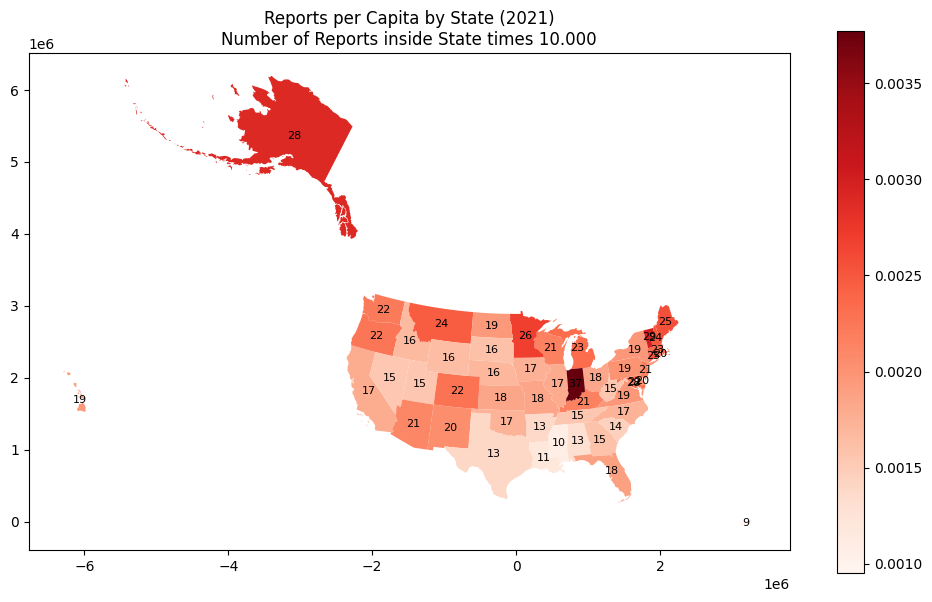

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load your 2021 VAERS data
data_2021 = pd.read_csv('/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/2021VAERSDATA.csv', encoding="Iso-8859-1", low_memory=False)
data_2021['STATE'] = data_2021['STATE'].str.upper()
# Load the population data
population_2021 = pd.read_excel('/Users/sep/Documents/HAW/Masterarbeit/Census_Population/NST-EST2023-POP.xlsx', skiprows=8, usecols=[0, 3]).dropna().reset_index(drop=True)
population_2021.columns = ['STATE', 'POPULATION']
population_2021['STATE'] = population_2021['STATE'].str.lstrip('.')
# Apply the mapping to convert state names to abbreviations
population_2021['STATE_SHORT'] = population_2021['STATE'].map(state_to_usps)

# Count the entries per state in the VAERS data and rename the series for clarity
state_counts = data_2021['STATE'].value_counts().rename('count')

# Merge the population data with the state counts
population_2021.set_index('STATE_SHORT', inplace=True)
state_counts_df = state_counts.to_frame().join(population_2021, how='left')
state_counts_df['count'] = state_counts_df['count'].astype('float64')
state_counts_df['entries_per_capita'] = state_counts_df['count'] / state_counts_df['POPULATION']

# Load the shapefile and set the projection
gdf = gpd.read_file('/Users/sep/Documents/HAW/Masterarbeit/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
gdf = gdf.to_crs('EPSG:5070')  # Albers Equal Area projection

# Merge the geodataframe with the calculated entries per capita
merged_gdf = gdf.set_index('STUSPS').join(state_counts_df[['entries_per_capita']])

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_gdf.plot(column='entries_per_capita', ax=ax, legend=True, cmap='Reds')

# Annotate each state with the number of entries
for x, y, label in zip(merged_gdf.geometry.centroid.x, merged_gdf.geometry.centroid.y, merged_gdf['entries_per_capita'] * 10000):
    ax.text(x, y, int(label), ha='center', va='center', fontsize=8, color='black')

plt.title('Reports per Capita by State (2021)' + '\n' + 'Number of Reports inside State times 10.000')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Reports_per_State/Reports_per_Capita_2021.png')
plt.show()


In [171]:
state_counts_df

,count,STATE,POPULATION,entries_per_capita
STATE,,,,
CA,69753.0,California,39145060.0,0.001782
FL,41353.0,Florida,21830708.0,0.001894
TX,40924.0,Texas,29561286.0,0.001384
NY,38914.0,New York,19854526.0,0.001960
PA,25967.0,Pennsylvania,13013614.0,0.001995
...,...,...,...,...
MH,8.0,NaN,NaN,NaN
FM,6.0,NaN,NaN,NaN
XV,2.0,NaN,NaN,NaN


In [247]:
import pandas as pd

# Define the columns to rename
columns_to_rename = {
    'Unnamed: 0': 'STATE',
    'Unnamed: 1': 'Population 2020',
    'Unnamed: 3': 'Population 2010',
    'Unnamed: 5': 'Population 2000',
    'Unnamed: 7': 'Population 1990',
}

# Load the population data and skip the first 4 rows
census_data = pd.read_excel('/Users/sep/Documents/HAW/Masterarbeit/Census_Population/population-change-data-table.xlsx', skiprows=4)

# Select the columns with odd indices and rename them
selected_columns = ['Unnamed: 0'] + list(census_data.columns[1::2])
census_data = census_data[selected_columns].rename(columns=columns_to_rename)

# Add the STATE_SHORT column by mapping state names to abbreviations
state_to_usps = {
    'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

census_data = census_data.iloc[:, :5]
census_data['STATE_SHORT'] = census_data['STATE'].map(state_to_usps)
census_data = census_data[['STATE', 'STATE_SHORT'] + [col for col in census_data.columns if col not in ['STATE', 'STATE_SHORT']]]


In [248]:
census_data

,STATE,STATE_SHORT,Resident Population 2020 Census,Resident Population 2010 Census,Resident Population 2000 Census,Resident Population 1990 Census
0,Alabama,AL,5024279.0,4779736.0,4447100.0,4040587.0
1,Alaska,AK,733391.0,710231.0,626932.0,550043.0
2,Arizona,AZ,7151502.0,6392017.0,5130632.0,3665228.0
3,Arkansas,AR,3011524.0,2915918.0,2673400.0,2350725.0
4,California,CA,39538223.0,37253956.0,33871648.0,29760021.0
5,Colorado,CO,5773714.0,5029196.0,4301261.0,3294394.0
6,Connecticut,CT,3605944.0,3574097.0,3405565.0,3287116.0
7,Delaware,DE,989948.0,897934.0,783600.0,666168.0
8,District of Columbia,DC,689545.0,601723.0,572059.0,606900.0
9,Florida,FL,21538187.0,18801310.0,15982378.0,12937926.0


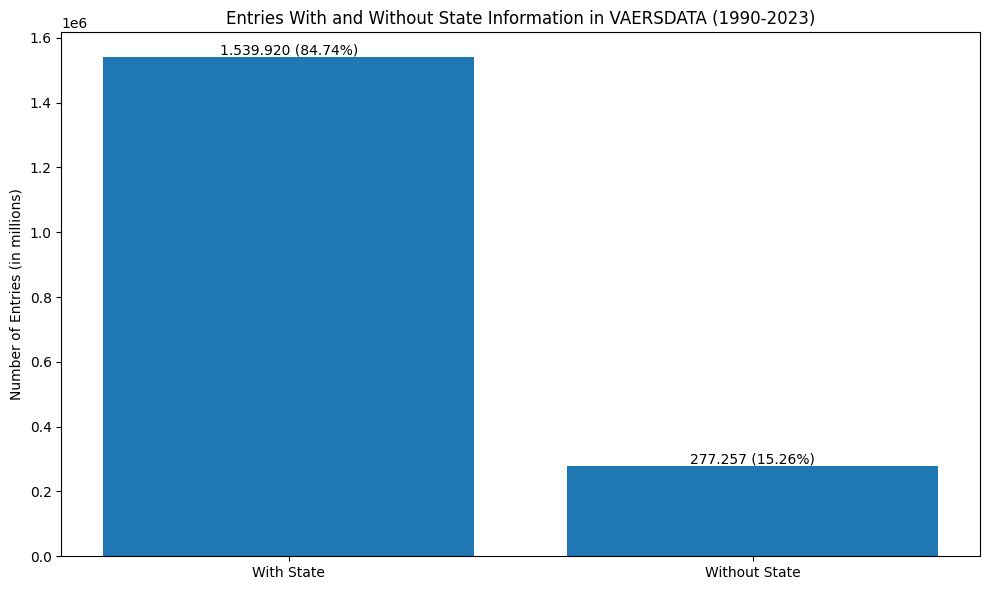

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize counters
count_with_state = 0
count_without_state = 0

for year in range(1990, 2024):
    # File path
    filename = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
    
    # Load dataset
    data_df = pd.read_csv(filename, encoding="Iso-8859-1", low_memory=False, usecols=['STATE'])
    
    # Count entries
    count_with_state += data_df['STATE'].notna().sum()
    count_without_state += data_df['STATE'].isna().sum()

# Total entries
total_entries = count_with_state + count_without_state

# Prepare data for plotting
categories = ['With State', 'Without State']
counts = [count_with_state, count_without_state]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts)

# Custom function to format number with period as thousand separator
def format_with_period(number):
    return format(number, ",d").replace(",", ".")

# Annotating with counts and percentages
for bar in bars:
    yval = bar.get_height()
    formatted_count = format_with_period(int(yval))
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{formatted_count} ({yval/total_entries*100:.2f}%)', ha='center', va='bottom')

plt.title('Entries With and Without State Information in VAERSDATA (1990-2023)')
plt.ylabel('Number of Entries (in millions)')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Reports_per_State/Entries_with_and_without_state.png')
plt.show()


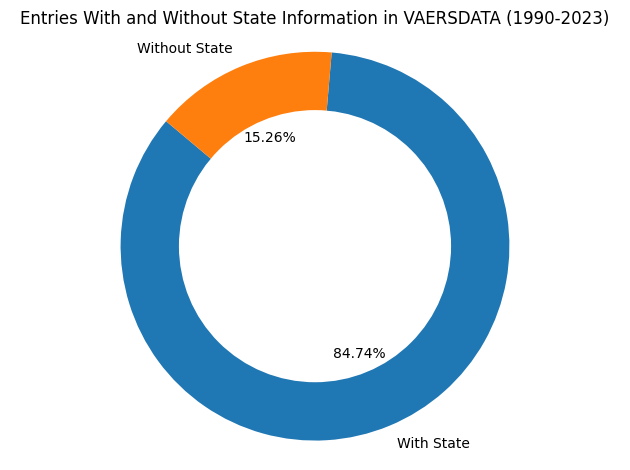

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize counters
count_with_state = 0
count_without_state = 0

for year in range(1990, 2024):
    # File path
    filename = f"/Users/sep/Documents/HAW/Masterarbeit/Daten.nosync/{year}VAERSDATA.csv"
    
    # Load dataset
    data_df = pd.read_csv(filename, encoding="Iso-8859-1", low_memory=False, usecols=['STATE'])
    
    # Count entries
    count_with_state += data_df['STATE'].notna().sum()
    count_without_state += data_df['STATE'].isna().sum()

# Total entries
total_entries = count_with_state + count_without_state

# Prepare data for donut chart
categories = ['With State', 'Without State']
counts = [count_with_state, count_without_state]
percentages = [x / total_entries * 100 for x in counts]

# Plotting
fig, ax = plt.subplots()
ax.pie(counts, labels=categories, autopct='%1.2f%%', startangle=140)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Entries With and Without State Information in VAERSDATA (1990-2023)')
plt.tight_layout()
plt.savefig('/Users/sep/PycharmProjects/Masterarbeit/Plots/Data_Exploration/Reports_per_State/Entries_with_and_without_state_donut.png')
plt.show()
